# predicting second hand car value

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# data cleaning

In [2]:
eww_df=pd.read_csv("cardekho.csv")

<Axes: >

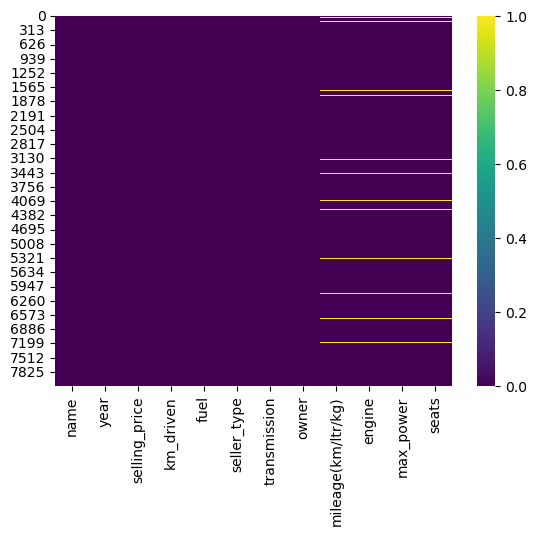

In [3]:
sns.heatmap(eww_df.isnull(),cmap='viridis')

In [4]:
df=eww_df.dropna()

In [5]:
unique_values = df['fuel'].unique()
print(f"fuel: {unique_values}")

unique_values1 = df['seller_type'].unique()
print(f"seller_type: {unique_values1}")

unique_values2 = df['transmission'].unique()
print(f"transmission: {unique_values2}")

unique_values3 = df['owner'].unique()
print(f"owner: {unique_values3}")

fuel: ['Diesel' 'Petrol' 'LPG' 'CNG']
seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']
transmission: ['Manual' 'Automatic']
owner: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [6]:
#this is where i changed values of fuel,seller,trans,owner
fuel_map={'Diesel':1,'Petrol':2,'LPG':3,'CNG':4}
seller_map={'Individual':0,'Dealer':1,'Trustmark Dealer':2}
trans_map={'Manual':0,'Automatic':1}
owner_map={'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3}

In [7]:
df['fuel']=df['fuel'].map(fuel_map)
df['seller_type']=df['seller_type'].map(seller_map)
df['transmission']=df['transmission'].map(trans_map)
df['owner']=df['owner'].map(owner_map)

/var/folders/kw/6gkydlyd5rv36gdrf5d_7nzc0000gn/T/ipykernel_28434/832111582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel']=df['fuel'].map(fuel_map)
/var/folders/kw/6gkydlyd5rv36gdrf5d_7nzc0000gn/T/ipykernel_28434/832111582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_type']=df['seller_type'].map(seller_map)
/var/folders/kw/6gkydlyd5rv36gdrf5d_7nzc0000gn/T/ipykernel_28434/832111582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [8]:
df.info()
new_df=df.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7907 non-null   object 
 1   year                7907 non-null   int64  
 2   selling_price       7907 non-null   int64  
 3   km_driven           7907 non-null   int64  
 4   fuel                7907 non-null   int64  
 5   seller_type         7907 non-null   int64  
 6   transmission        7907 non-null   int64  
 7   owner               7902 non-null   float64
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7907 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 803.1+ KB


In [9]:
new_df.drop(['name'],axis=1,inplace=True)

In [10]:
#since max_power had some string input so we had to remove that
new_df['max_power'] = pd.to_numeric(new_df['max_power'], errors='coerce')
new_df = new_df.dropna(subset=['max_power'])

In [11]:

new_df.dropna()
new_df['owner'].fillna(3,inplace=True)
new_df['owner']=new_df['owner'].astype(int)
new_df['mileage(km/ltr/kg)']=new_df['mileage(km/ltr/kg)'].astype(int).apply(math.ceil)
new_df['engine']=new_df['engine'].astype(int)
new_df['max_power']=new_df['max_power'].astype('int').apply(math.ceil)
new_df['seats']=new_df['seats'].astype('int')

In [12]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year                7906 non-null   int64
 1   selling_price       7906 non-null   int64
 2   km_driven           7906 non-null   int64
 3   fuel                7906 non-null   int64
 4   seller_type         7906 non-null   int64
 5   transmission        7906 non-null   int64
 6   owner               7906 non-null   int64
 7   mileage(km/ltr/kg)  7906 non-null   int64
 8   engine              7906 non-null   int64
 9   max_power           7906 non-null   int64
 10  seats               7906 non-null   int64
dtypes: int64(11)
memory usage: 741.2 KB


# now data has been cleaned and is in a homogenius format

/Users/ayushmohite/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayushmohite/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayushmohite/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayushmohite/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

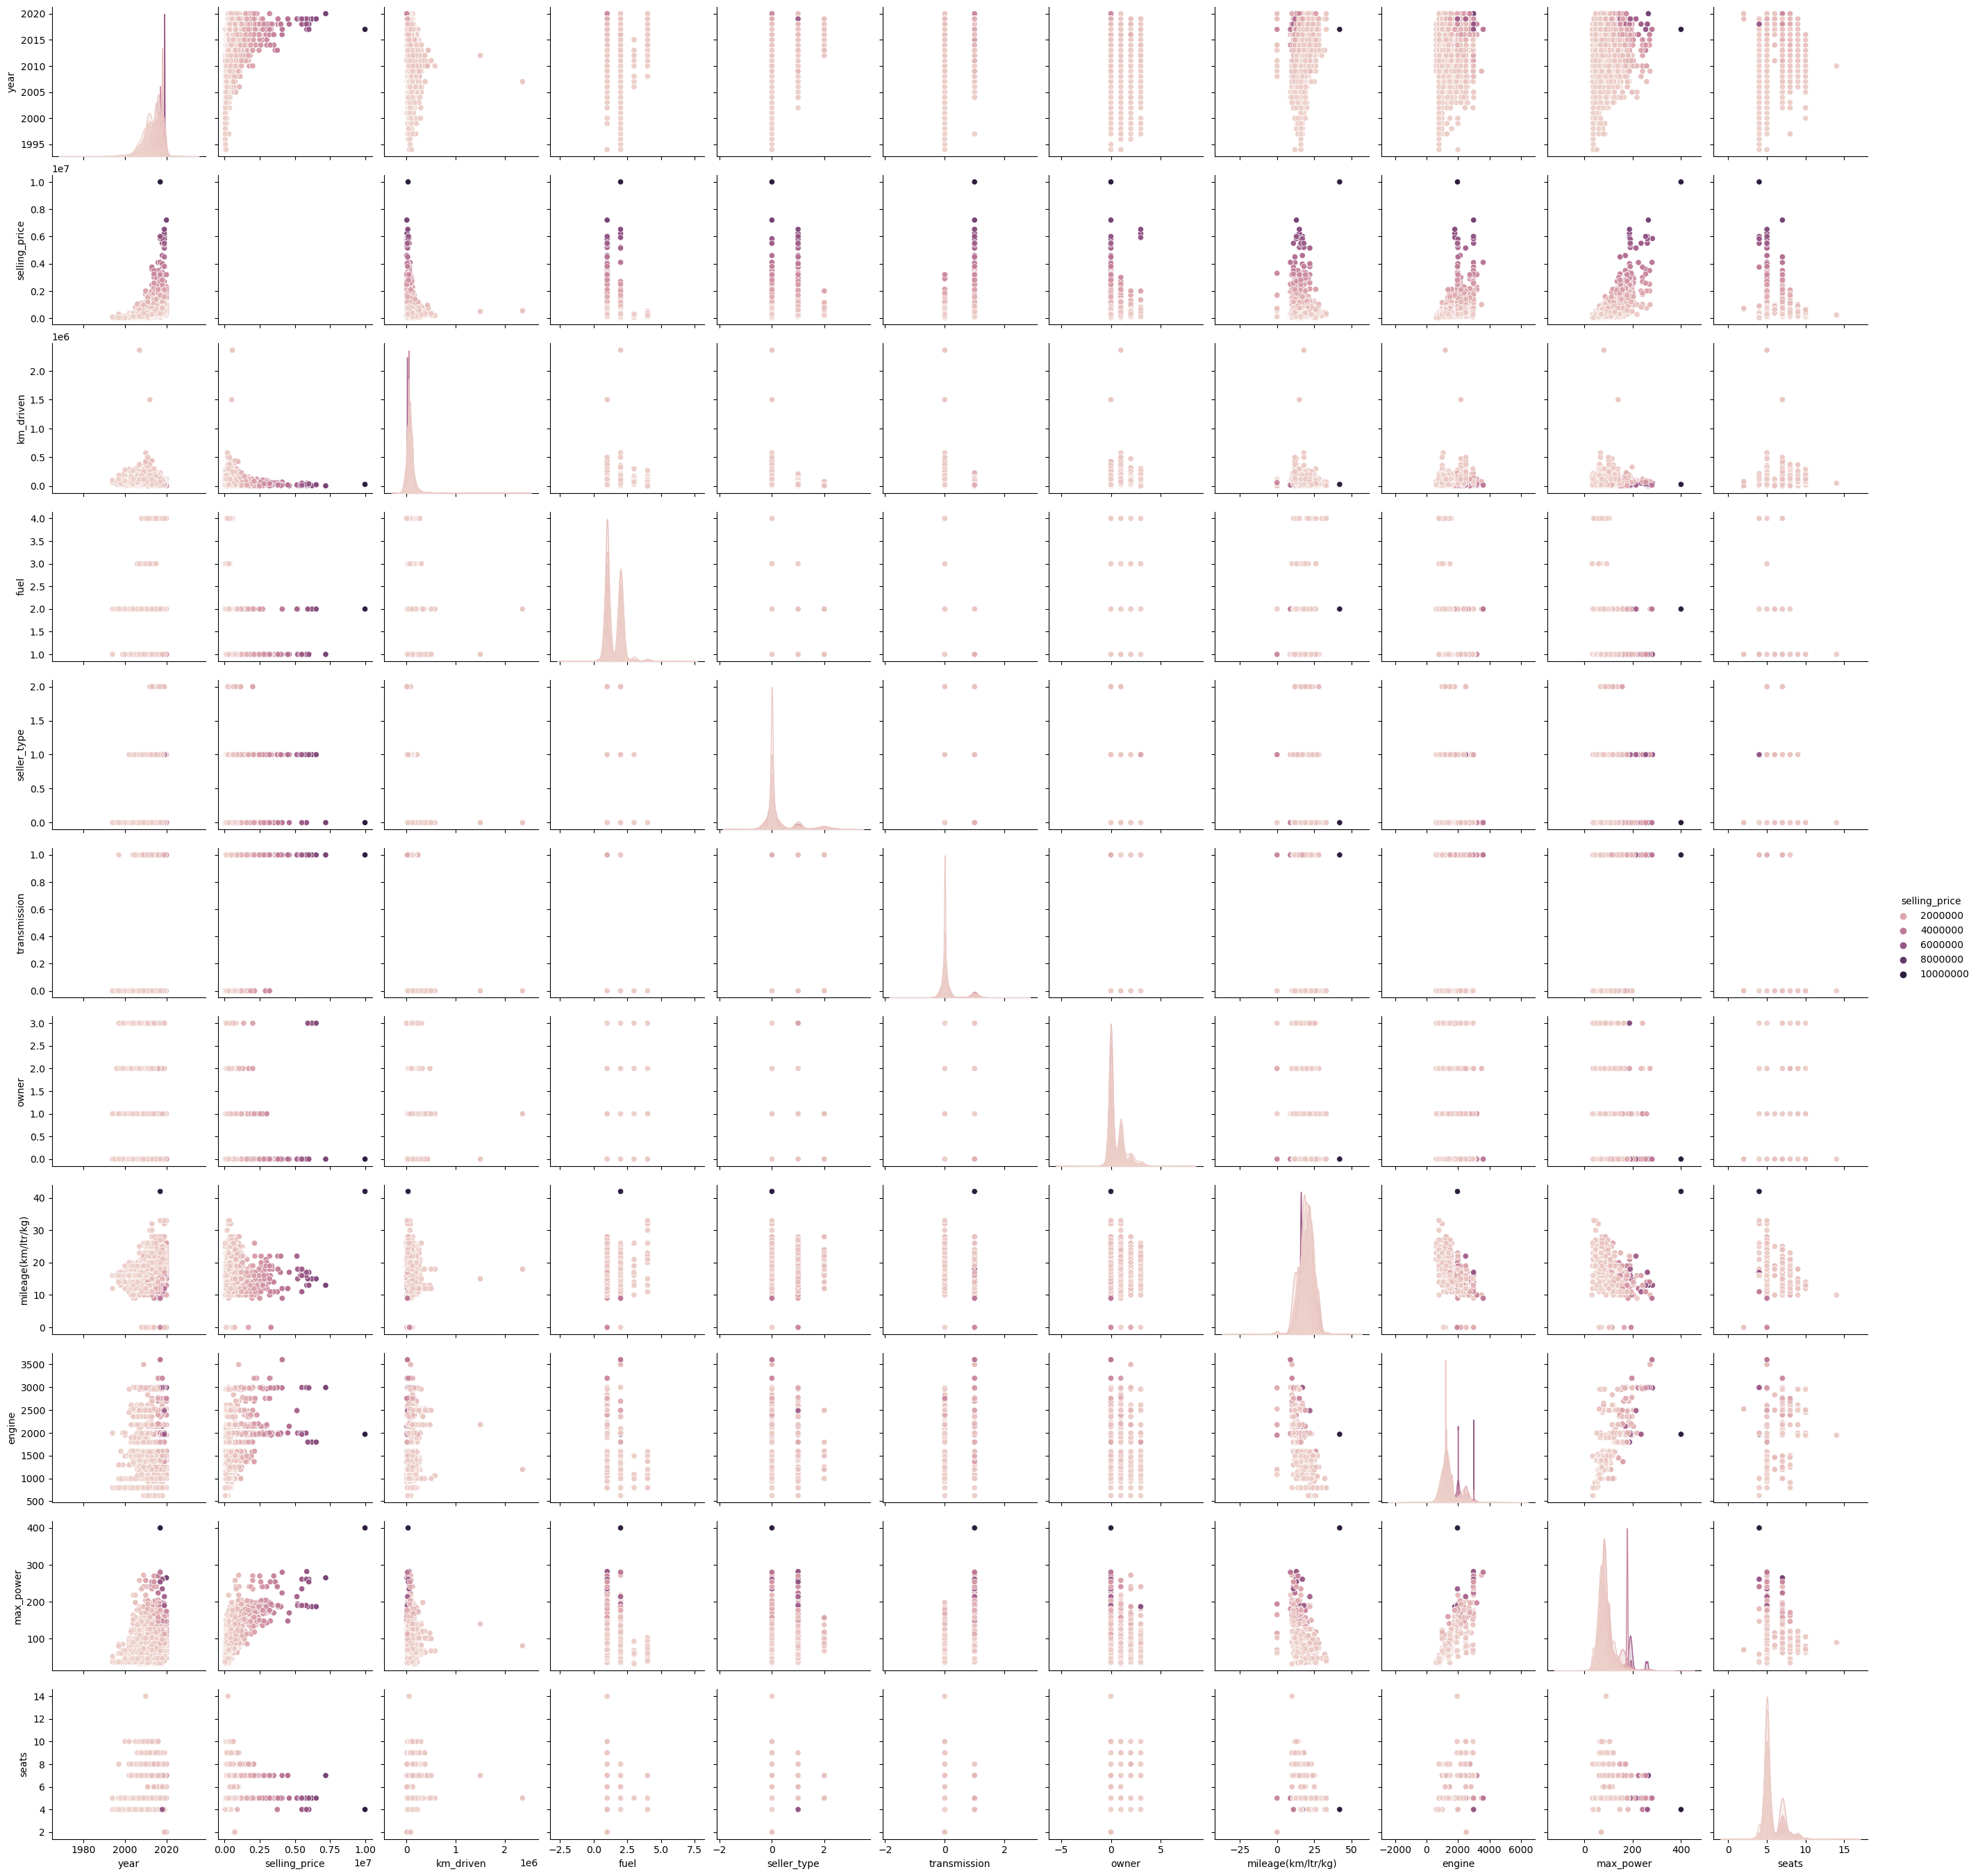

In [13]:
sns.pairplot(new_df,hue='selling_price',vars=['year','selling_price','km_driven','fuel','seller_type','transmission','owner','mileage(km/ltr/kg)','engine','max_power','seats' ])
plt.savefig('pairplot_car.jpg')

In [14]:
input_col=list(new_df[1:])
input_col.remove('selling_price')
target_col='selling_price'
x=new_df[input_col]
y=new_df[target_col]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x.shape,x_train.shape,x_test.shape,y_train.shape

((7906, 10), (6324, 10), (1582, 10), (6324,))

In [21]:
model=LinearRegression()
model.fit(x_train,y_train)
#a=int(input('which year was the car manufactured?'))
#b=int(input('how much km driven?'))
#c=int(input('fuel type? if Diesel = 1 , Petrol=2, LPG=3, CNG=4 '))
#d=int(input('seller type? if Individual=0, Dealer=1, Trustmark Dealer=2'))
#e=int(input('transmission? if Manual=0, Automatic=1'))
#f=int(input('owner?if First Owner=0, Second Owner=1, Third Owner=2, Fourth & Above Owner=3 ' ))
#g= int(input('mileage?'))
#h=int(input('engine cc?'))
#i=int(input('max_power?'))
#j=int(input('seats?'))

#user_input = {'year':[a], 'km_driven': [b], 'fuel': [c],'seller_type':[d],'transmission':[e],'owner':[f],'mileage(km/ltr/kg)': [g], 'engine': [h],'max_power':[i],'seats':[j]}
#user_df=pd.DataFrame(user_input)
y_predict=model.predict(x_test)
print(f'selling price for your ar would be: {y_predict}')
# Calculate R2 score
r2 = r2_score(y_test, y_predict)
print("R-squared (R2) Score:", r2)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error (MAE):", mae)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_predict, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


selling price for your ar would be: [668601.95937502 380945.99324803 283807.85431786 ...  59644.93683349
 624377.36365436 -68231.60556193]
R-squared (R2) Score: 0.6800090859539678
Mean Absolute Error (MAE): 272048.8938367993
Root Mean Squared Error (RMSE): 469530.26670814346


In [17]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [20]:
params = {'fit_intercept': [True, False], 'positive': [True, False], 'copy_X': [True, False], 'n_jobs': [None]}
grid=GridSearchCV(model,params,cv=5)
grid.fit(x_train,y_train)
y_pred=grid.predict(x_test)

In [22]:
# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R2) Score: 0.6800090859539678
Mean Absolute Error (MAE): 272048.8938367993
Root Mean Squared Error (RMSE): 469530.26670814346


## 